<a href="https://colab.research.google.com/github/ozgurakgun/notebooks/blob/main/Nugget_140_Magic_Hexagon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nugget 140: A new model for the Magic Hexagon problem

Author: Özgür Akgün (Special thanks to Stella Mortarotti for the visualisations.)

One of our VIP students (Stella Mortarotti) wanted to do a visualisation of the [Magic Hexagon problem](https://www.csplib.org/Problems/prob023/).

We then noticed that the model on CSPLib is, to put it mildly, broken.

It was one of the models that were written by the York undergrads back in 2007.

I wrote a new model and will update the CSPLib entry soon. Here is a nugget explaining the new model. There are some interesting points, especially in terms of the coordinate system we use and Stella's visualisation.


## Setting up Conjure

In [1]:
!source <(curl -s https://raw.githubusercontent.com/conjure-cp/conjure-notebook/v0.0.10/scripts/install-colab.sh)
%reload_ext conjure

Installing Conjure version v2.5.1 and Conjure Notebook version v0.0.10...
Downloading...
Conjure: The Automated Constraint Modelling Tool
Release version 2.5.1
Repository version a9cbc2e (2023-11-07 23:44:00 +0000)


<IPython.core.display.Javascript object>

Conjure extension is loaded - run `%conjure_help`

I don't want Conjure printing solutions and I want it displaying some stats.

## Problem definition

Shamelessly stealing from CSPLib:

A magic hexagon consists of the numbers 1 to 19 arranged in a hexagonal pattern:

<center><pre>
A,B,C
D,E,F,G
H,I,J,K,L
M,N,O,P
Q,R,S
</pre></center>

We have a constraint that all diagonals sum to 38. That is,

<pre>
A+B+C = D+E+F+G = ... = Q+R+S = 38,
A+D+H = B+E+I+M = ... = L+P+S = 38,
C+G+L = B+F+K+P = ... = H+M+Q = 38.
</pre>

The problem can be generalized to other sizes. This is the diameter 5 problem.

![d=5 magic hexagon](https://www.csplib.org/Problems/prob023/assets/magic.jpg)


----


This magic hexagon has diameter = 5 and order = 3.

Diamater is the length of the longest row, order is the length of the shortest row.

Wikipedia is quite good about Magic Hexagons: https://en.wikipedia.org/wiki/Magic_hexagon

We will write a generic model, though there are no other solutions in other sizes anyway (except the trivial order=1 solution). There in extension called abnormal magic hexagons which has more solutions. The model we develop can easily be changed to find abnormal magic hexagons.

In [2]:
order = 3

## Cube coordinates

This is the coordinate system we are using. Instead of using a 2D matrix that is padded with zeroes and a very complex neghbourhood relation, we use a 3D matrix that is padded with zeroes. This allows a trivial definition of being on the same row/diagonal.

The hexagon is only defined where the indices add up to 0.

See the "Cube coordinates" variant explained here: https://math.stackexchange.com/questions/2254655/hexagon-grid-coordinate-system

Even better (and interactive!): https://www.redblobgames.com/grids/hexagons/#coordinates

![Cube coordinates](https://i.stack.imgur.com/e2Ipz.png)

> Another way to look at hexagonal grids is to see that there are three primary axes, unlike the two we have for square grids. There’s an elegant symmetry with these.

> Instead of having two values per coodinate, representing how far North and South the hexagon is, you can use three dimensions.



## Model, basic definitions

In [3]:
%%conjure

given order : int

letting ix be order - 1

letting diameter be order * 2 - 1
letting maxval be 3 * order**2 - 3 * order + 1,
letting maxsum be sum i : int(maxval + 1 - diameter .. maxval) . i,

find hexagon : matrix indexed by [int(-ix..ix), int(-ix..ix), int(-ix..ix)] of int(0..maxval)

```json
{"hexagon": {"-1": {"-1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "-2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "0": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}}, "-2": {"-1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "-2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "0": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}}, "0": {"-1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "-2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "0": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}}, "1": {"-1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "-2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "0": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}}, "2": {"-1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "-2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "0": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "1": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}, "2": {"-1": 0, "-2": 0, "0": 0, "1": 0, "2": 0}}}}
```

| Statistic | Value |
|:-|-:|
| SolverTotalTime | 0.006 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.166 |
| SolverFailures | 0 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 126 |


The above _finds_ a solution, but without any of the constraints, of course. Let's use is as a way of testign the visualisation. We will keep updating the visualisation as we go.

This is Stella's code for visualising a hexagon.

## Solution visualisation

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np

%matplotlib inline

def view_hexagon(sol):
  # Extract 3D coordinates and labels
  coordinates = []
  labels = []
  for x in sol:
    for y in sol[x]:
        for z in sol[x][y]:
          if int(x) + int(y) + int(z) == 0:
            coordinates.append((int(x), int(y), int(z)))
            labels.append(sol[x][y][z])

  # Horizontal cartesian coords
  hcoord = [c[0] for c in coordinates]

  # Vertical cartersian coords
  vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coordinates]

  fig, ax = plt.subplots(1)
  ax.set_aspect('equal')

  # Add some coloured hexagons
  for x, y, l in zip(hcoord, vcoord, labels):
      hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3.,
                          orientation=np.radians(30), alpha=0.2, edgecolor='k')
      ax.add_patch(hex)
      ax.text(x, y, l, ha='center', va='center', size=10)

  # Also add scatter points in hexagon centres to keep axis fixed
  ax.scatter(hcoord, vcoord, alpha=0)

  plt.show()

# We define an additional function called conjure_display_solution
# This function will be called by Conjure Notebook instead of printing the solution
def conjure_display_solution():
    view_hexagon(hexagon)

Let's print/display the solution we had in the previous step explicitly. We won't have to call view_hexagon directly again, conjure_display_solution() will be called automatically for every solution.

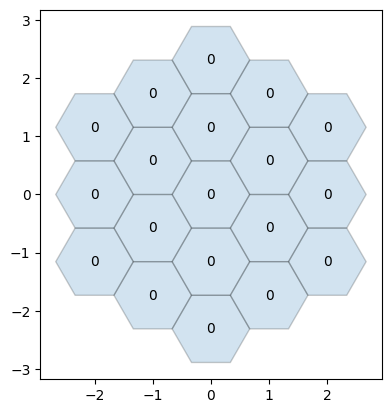

In [5]:
view_hexagon(hexagon)

As expected, all zeroes. Adding a constraint to say: a non-zero value must be assigned to cells whose indices sum up to 0.

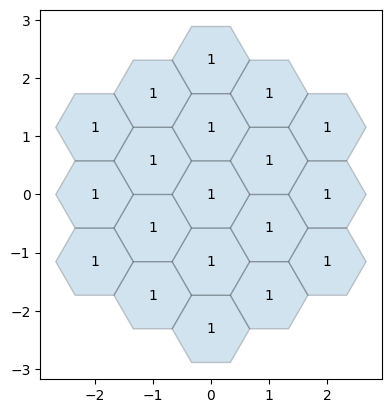

| Statistic | Value |
|:-|-:|
| SolverTotalTime | 0.011 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.158 |
| SolverFailures | 0 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 126 |


In [6]:
%%conjure+

$ used cells
such that
[ hexagon[i, j, k] != 0
| i, j, k : int(-ix..ix)
, i + j + k = 0
]

All 1s, that will do! Let's also explicitly say that the padding cells must be assigned to 0. We don't want the solver to consider anything else for these cells.

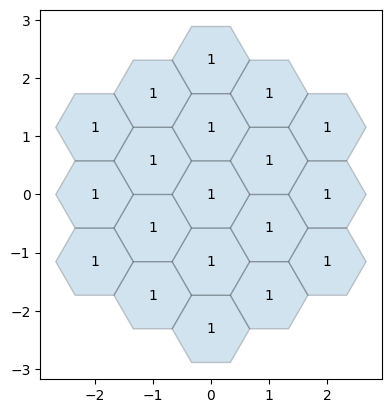

| Statistic | Value |
|:-|-:|
| SolverTotalTime | 0.002 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.2 |
| SolverFailures | 0 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 20 |


In [7]:
%%conjure+

$ unused cells
such that
[ hexagon[i, j, k] = 0
| i, j, k : int(-ix..ix)
, i + j + k != 0
]


Adding the first interesting constraint. All the numbers in the hexagon 3D array must be distinct, except when they are 0 which is not constrained.

## All different

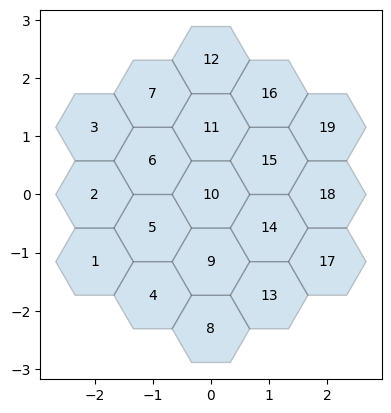

| Statistic | Value |
|:-|-:|
| SolverTotalTime | 0.014 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.527 |
| SolverFailures | 0 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 19 |


In [8]:
%%conjure+

such that alldifferent_except(flatten(hexagon), 0)

To implement the sum constraint, we define a single integer decision variable that all rows/diagonals will sum up to.

Let's also update the conjure_display_solution function so it displays the sum too.

## Sum

In [9]:
def conjure_display_solution():
    view_hexagon(hexagon)
    print(f'The sum is: {sumsto}')

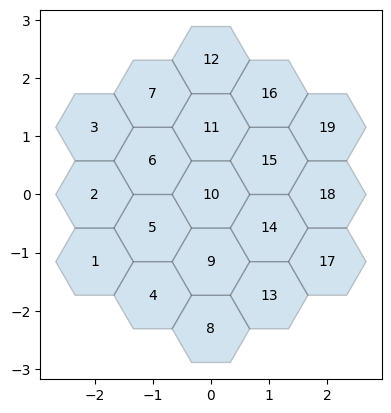

The sum is: 0


| Statistic | Value |
|:-|-:|
| SolverTotalTime | 0.020 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.46 |
| SolverFailures | 0 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 20 |


In [10]:
%%conjure+

find sumsto : int(0..maxsum)

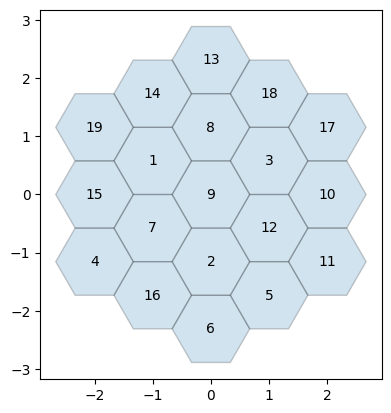

The sum is: 38


| Statistic | Value |
|:-|-:|
| SolverTotalTime | 1.051 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.535 |
| SolverFailures | 23603 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 26832 |


In [11]:
%%conjure+

such that
[ sumsto = sum([hexagon[i, j, k] | j, k : int(-ix..ix)])
| i : int(-ix..ix)
]

Rows/diagonals in the first dimension should add up to `sumsto`. Here we take advantage of the 0-padding and avoid adding a `i+j+k=0` filter.

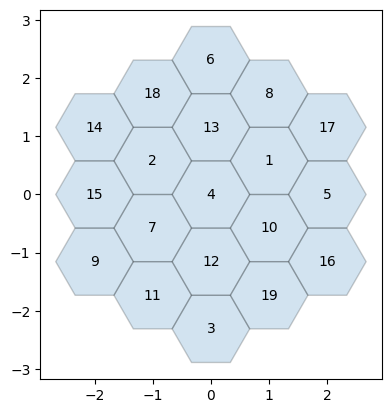

The sum is: 38


| Statistic | Value |
|:-|-:|
| SolverTotalTime | 0.088 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.914 |
| SolverFailures | 927 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 1050 |


In [12]:
%%conjure+

such that
[ sumsto = sum([hexagon[i, j, k] | i, k : int(-ix..ix)])
| j : int(-ix..ix)
]

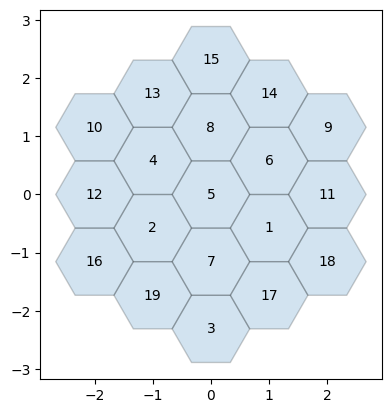

The sum is: 38


| Statistic | Value |
|:-|-:|
| SolverTotalTime | 0.370 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.507 |
| SolverFailures | 5572 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 6256 |


In [13]:
%%conjure+

such that
[ sumsto = sum([hexagon[i, j, k] | i, j : int(-ix..ix)])
| k : int(-ix..ix)
]

## Finding all solutions

## Solution 1

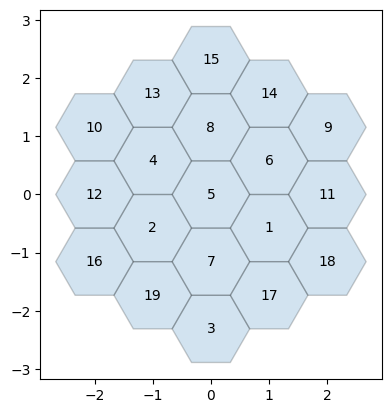

The sum is: 38


## Solution 2

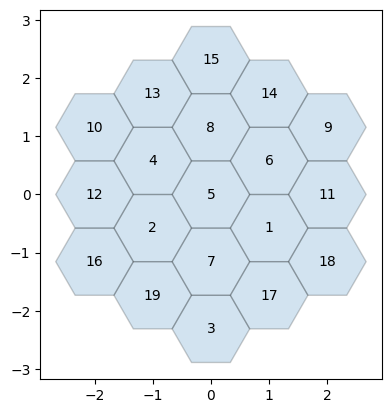

The sum is: 38


## Solution 3

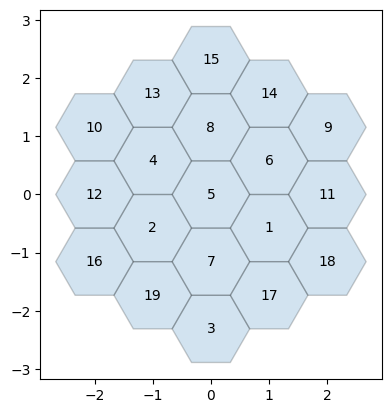

The sum is: 38


## Solution 4

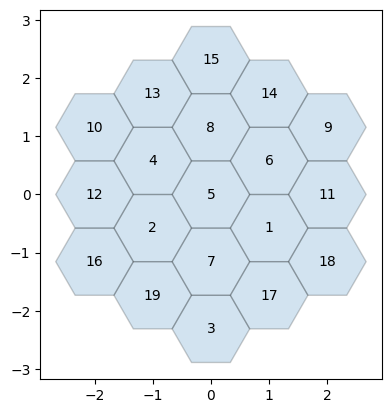

The sum is: 38


## Solution 5

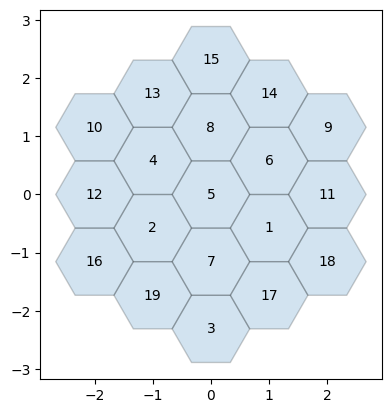

The sum is: 38


## Solution 6

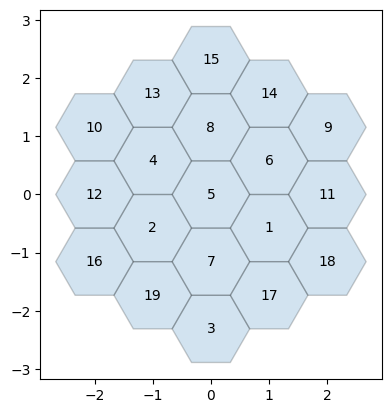

The sum is: 38


## Solution 7

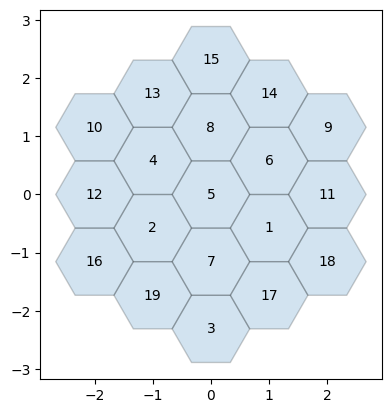

The sum is: 38


## Solution 8

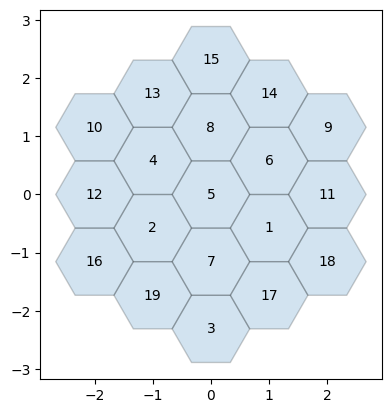

The sum is: 38


## Solution 9

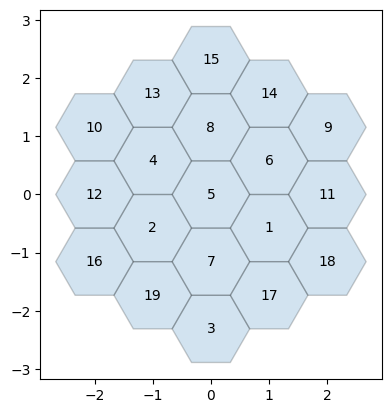

The sum is: 38


## Solution 10

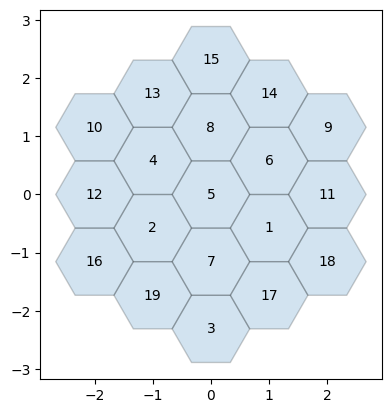

The sum is: 38


## Solution 11

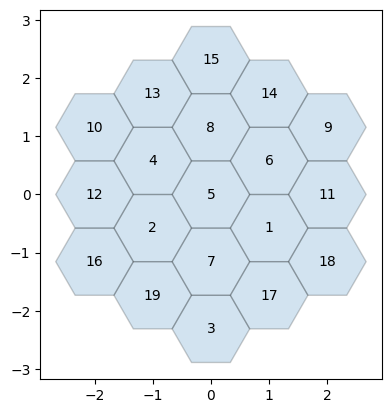

The sum is: 38


## Solution 12

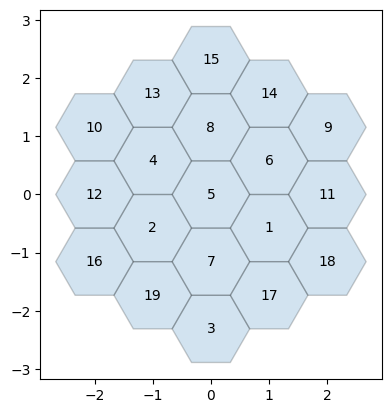

The sum is: 38


| Statistic | Value |
|:-|-:|
| SolverTotalTime | 22.062 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.628 |
| SolverFailures | 156384 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 166026 |


In [14]:
%%conjure+ --number-of-solutions=all

Oops, there are 12 solutions (up to symmetry).

## Symmetry breaking

Adding symmetry breaking constaints and solving for all solutions again. Should find only one solution.

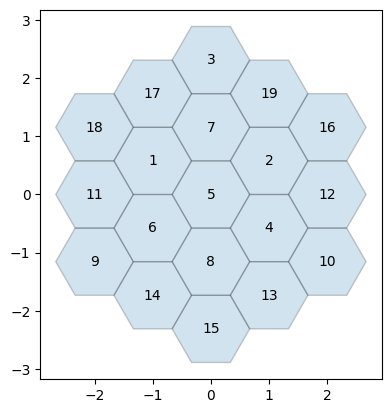

The sum is: 38


| Statistic | Value |
|:-|-:|
| SolverTotalTime | 1.802 |
| SavileRowClauseOut | 0 |
| SavileRowTotalTime | 0.609 |
| SolverFailures | 21809 |
| SolverSatisfiable | 1 |
| SavileRowTimeOut | 0 |
| SolverTimeOut | 0 |
| SolverNodes | 23962 |


In [15]:
%%conjure+ --number-of-solutions=all

$ symmetry breaking
$ see: https://proofwiki.org/wiki/Definition:Symmetry_Group_of_Regular_Hexagon#Group_Action_on_Vertices

find A : int(0..maxval) such that A = hexagon[0,ix,-ix]
find B : int(0..maxval) such that B = hexagon[ix,0,-ix]
find C : int(0..maxval) such that C = hexagon[ix,-ix,0]
find D : int(0..maxval) such that D = hexagon[-ix,0,ix]
find E : int(0..maxval) such that E = hexagon[0,-ix,ix]
find F : int(0..maxval) such that F = hexagon[-ix,ix,0]

such that [A,B,C,D,E,F] <=lex [B,C,D,E,F,A]
such that [A,B,C,D,E,F] <=lex [C,D,E,F,A,B]
such that [A,B,C,D,E,F] <=lex [D,E,F,A,B,C]
such that [A,B,C,D,E,F] <=lex [E,F,A,B,C,D]
such that [A,B,C,D,E,F] <=lex [F,A,B,C,D,E]

such that [A,B,C,D,E,F] <=lex [A,F,E,D,C,B]
such that [A,B,C,D,E,F] <=lex [B,A,F,E,D,C]
such that [A,B,C,D,E,F] <=lex [C,B,A,F,E,D]
such that [A,B,C,D,E,F] <=lex [D,C,B,A,F,E]
such that [A,B,C,D,E,F] <=lex [E,D,C,B,A,F]
such that [A,B,C,D,E,F] <=lex [F,E,D,C,B,A]


## Complete model

In case you wanted to it all in one place.

In [16]:
%conjure_print


given order : int

letting ix be order - 1

letting diameter be order * 2 - 1
letting maxval be 3 * order**2 - 3 * order + 1,
letting maxsum be sum i : int(maxval + 1 - diameter .. maxval) . i,

find hexagon : matrix indexed by [int(-ix..ix), int(-ix..ix), int(-ix..ix)] of int(0..maxval)


$ used cells
such that
[ hexagon[i, j, k] != 0
| i, j, k : int(-ix..ix)
, i + j + k = 0
]


$ unused cells
such that
[ hexagon[i, j, k] = 0
| i, j, k : int(-ix..ix)
, i + j + k != 0
]


such that alldifferent_except(flatten(hexagon), 0)


find sumsto : int(0..maxsum)


such that
[ sumsto = sum([hexagon[i, j, k] | j, k : int(-ix..ix)])
| i : int(-ix..ix)
]


such that
[ sumsto = sum([hexagon[i, j, k] | i, k : int(-ix..ix)])
| j : int(-ix..ix)
]


such that
[ sumsto = sum([hexagon[i, j, k] | i, j : int(-ix..ix)])
| k : int(-ix..ix)
]

 

$ symmetry breaking
$ see: https://proofwiki.org/wiki/Definition:Symmetry_Group_of_Regular_Hexagon#Group_Action_on_Vertices

find A : int(0..maxval) such that A = hex